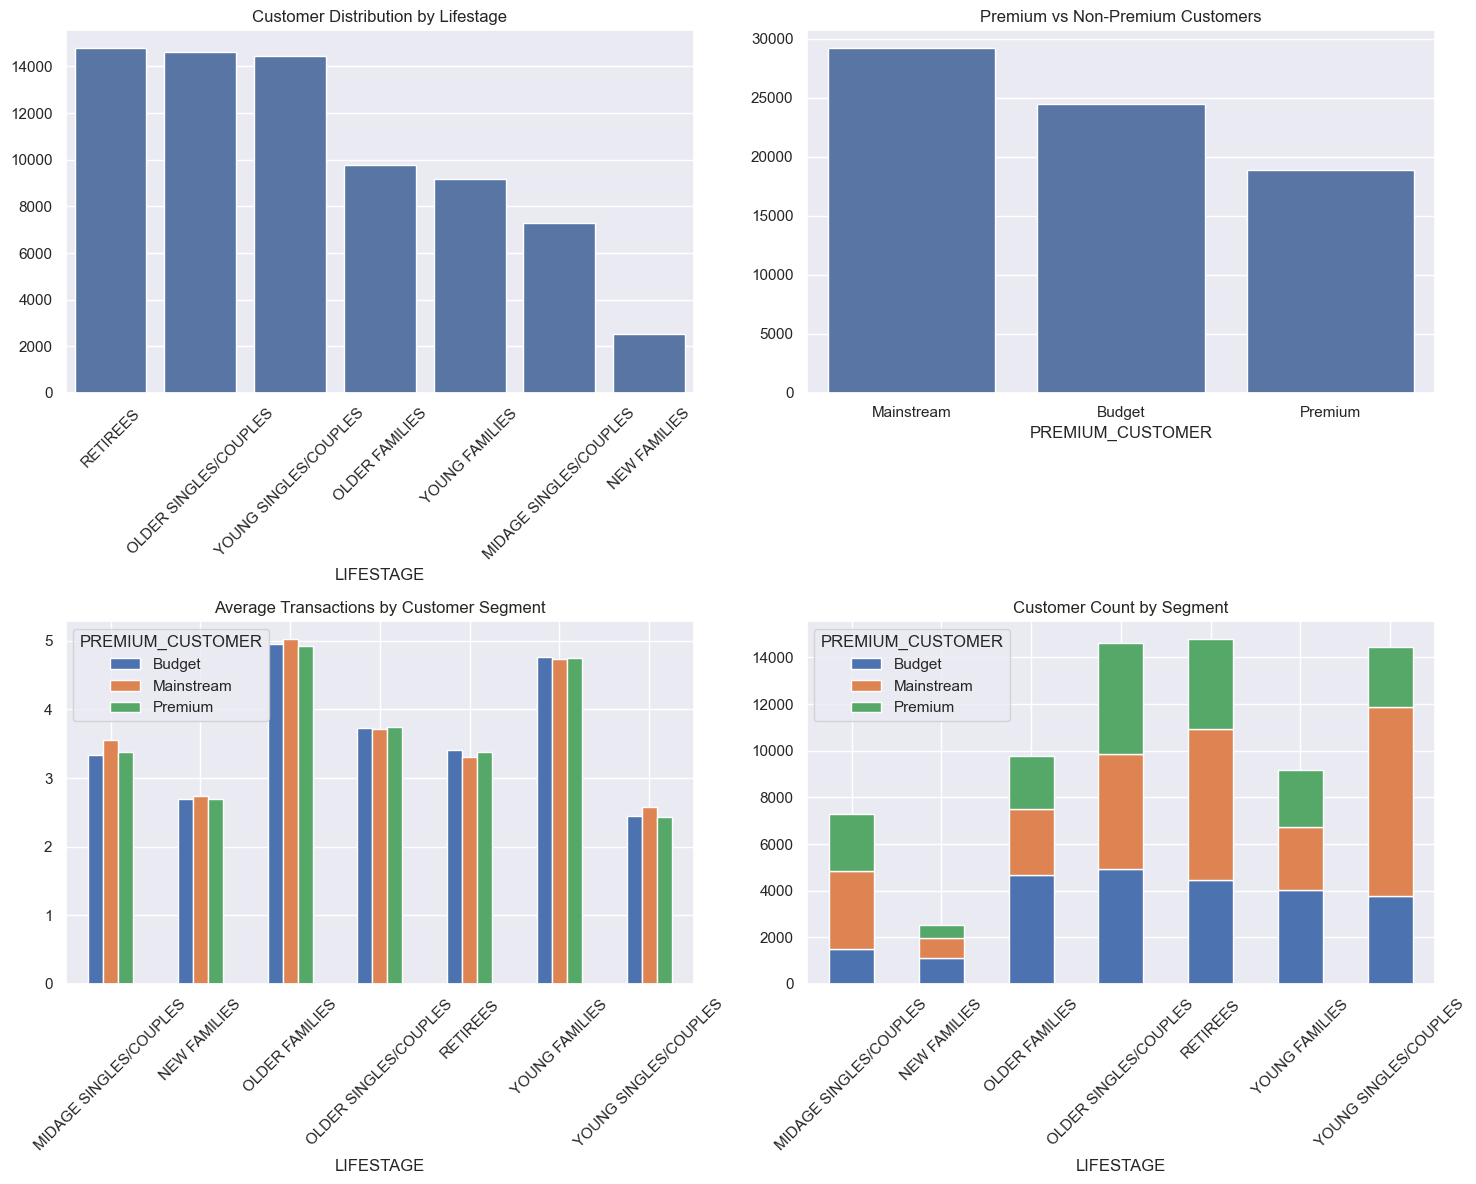


    Customer Segment Analysis Summary
    
    1. Most Valuable Customer Segments:
            LIFESTAGE PREMIUM_CUSTOMER  AVG_TRANSACTIONS_PER_CUSTOMER
7  OLDER FAMILIES       Mainstream                       5.031438
6  OLDER FAMILIES           Budget                       4.954011
8  OLDER FAMILIES          Premium                       4.921724
    
    2. Customer Segment Distribution:
    PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1504        3340     2431
NEW FAMILIES              1112         849      588
OLDER FAMILIES            4675        2831     2274
OLDER SINGLES/COUPLES     4929        4930     4750
RETIREES                  4454        6479     3872
YOUNG FAMILIES            4017        2728     2433
YOUNG SINGLES/COUPLES     3779        8088     2574
    
    3. Key Findings:
    - Most active customer lifestage: OLDER SINGLES/COUPLES
    - Average transactions per customer: 3.63
 

In [8]:
# Basic data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Machine learning and preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style properly
sns.set_theme()

# Read the datasets
def load_data():
    purchase_df = pd.read_csv('purchase_behaviour.csv')
    transaction_df = pd.read_csv('transaction_data.csv')
    return purchase_df, transaction_df

# Data preprocessing
def preprocess_data(purchase_df, transaction_df):
    # Clean purchase behavior data
    purchase_clean = purchase_df.copy()
    
    # Encode categorical variables
    le = LabelEncoder()
    purchase_clean['LIFESTAGE_ENCODED'] = le.fit_transform(purchase_clean['LIFESTAGE'])
    purchase_clean['PREMIUM_CUSTOMER_ENCODED'] = le.fit_transform(purchase_clean['PREMIUM_CUSTOMER'])
    
    # Process transaction data
    transaction_clean = transaction_df.copy()
    transaction_clean['DATE'] = pd.to_datetime(transaction_clean['DATE'])
    
    return purchase_clean, transaction_clean

# Analyze customer segments
def analyze_customer_segments(purchase_df):
    # Calculate segment distributions
    lifestage_dist = purchase_df['LIFESTAGE'].value_counts()
    premium_dist = purchase_df['PREMIUM_CUSTOMER'].value_counts()
    
    # Cross-tabulation of LIFESTAGE and PREMIUM_CUSTOMER
    segment_cross = pd.crosstab(purchase_df['LIFESTAGE'], 
                               purchase_df['PREMIUM_CUSTOMER'])
    
    return lifestage_dist, premium_dist, segment_cross

# Analyze transaction patterns
def analyze_transactions(transaction_df, purchase_df):
    # Merge transaction data with customer information
    merged_data = pd.merge(transaction_df, purchase_df, 
                          on='LYLTY_CARD_NBR', 
                          how='left')
    
    # Calculate key metrics by customer segment
    segment_metrics = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
        'DATE': 'count',  # Number of transactions
        'LYLTY_CARD_NBR': 'nunique'  # Number of unique customers
    }).reset_index()
    
    segment_metrics.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 
                             'TRANSACTION_COUNT', 'CUSTOMER_COUNT']
    
    # Calculate average transactions per customer
    segment_metrics['AVG_TRANSACTIONS_PER_CUSTOMER'] = (
        segment_metrics['TRANSACTION_COUNT'] / segment_metrics['CUSTOMER_COUNT']
    )
    
    return segment_metrics

# Create visualizations (Fixed version)
def create_visualizations(lifestage_dist, premium_dist, segment_metrics):
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Lifestage Distribution
    sns.barplot(x=lifestage_dist.index, y=lifestage_dist.values, ax=axes[0,0])
    axes[0,0].set_title('Customer Distribution by Lifestage')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Premium Customer Distribution
    sns.barplot(x=premium_dist.index, y=premium_dist.values, ax=axes[0,1])
    axes[0,1].set_title('Premium vs Non-Premium Customers')
    
    # Plot 3: Average Transactions by Lifestage
    pivot_data = segment_metrics.pivot_table(
        values='AVG_TRANSACTIONS_PER_CUSTOMER',
        index='LIFESTAGE',
        columns='PREMIUM_CUSTOMER'
    )
    pivot_data.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Average Transactions by Customer Segment')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Customer Count by Segment
    pivot_data_count = segment_metrics.pivot_table(
        values='CUSTOMER_COUNT',
        index='LIFESTAGE',
        columns='PREMIUM_CUSTOMER'
    )
    pivot_data_count.plot(kind='bar', stacked=True, ax=axes[1,1])
    axes[1,1].set_title('Customer Count by Segment')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Generate insights summary
def generate_summary(segment_metrics, segment_cross):
    # Find most valuable segments
    top_segments = segment_metrics.nlargest(3, 'AVG_TRANSACTIONS_PER_CUSTOMER')
    
    summary = """
    Customer Segment Analysis Summary
    
    1. Most Valuable Customer Segments:
    {}
    
    2. Customer Segment Distribution:
    {}
    
    3. Key Findings:
    - Most active customer lifestage: {}
    - Average transactions per customer: {:.2f}
    
    4. Recommendations:
    - Focus marketing efforts on {} lifestage customers
    - Target conversion of non-premium to premium in {} segment
    - Develop retention strategies for {} customers
    """.format(
        top_segments[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_TRANSACTIONS_PER_CUSTOMER']].to_string(),
        segment_cross.to_string(),
        segment_metrics.groupby('LIFESTAGE')['TRANSACTION_COUNT'].sum().idxmax(),
        segment_metrics['AVG_TRANSACTIONS_PER_CUSTOMER'].mean(),
        top_segments.iloc[0]['LIFESTAGE'],
        top_segments.iloc[1]['LIFESTAGE'],
        top_segments.iloc[2]['LIFESTAGE']
    )
    
    return summary

# Main execution
def main():
    # Load data
    purchase_df, transaction_df = load_data()
    
    # Preprocess data
    purchase_clean, transaction_clean = preprocess_data(purchase_df, transaction_df)
    
    # Perform analyses
    lifestage_dist, premium_dist, segment_cross = analyze_customer_segments(purchase_clean)
    segment_metrics = analyze_transactions(transaction_clean, purchase_clean)
    
    # Create visualizations
    create_visualizations(lifestage_dist, premium_dist, segment_metrics)
    
    # Generate summary
    summary = generate_summary(segment_metrics, segment_cross)
    print(summary)
    
    return purchase_clean, transaction_clean, segment_metrics

if __name__ == "__main__":
    purchase_clean, transaction_clean, segment_metrics = main()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the datasets
purchase_behavior = pd.read_csv('purchase_behaviour.csv')
transaction_data = pd.read_csv('transaction_data.csv')

# Display the first few rows of each dataset
print("Purchase Behavior Data:")
print(purchase_behavior.head())

print("\nTransaction Data:")
print(transaction_data.head())

# Step 1: Merge the two datasets on LYLTY_CARD_NBR
merged_data = pd.merge(transaction_data, purchase_behavior, on='LYLTY_CARD_NBR', how='inner')

# Step 2: Feature Engineering - Calculate total spending per customer
merged_data['Total_Spending'] = merged_data['PROD_QTY'] * merged_data['TOT_SALES']

# Group by customer and calculate total spending and purchase frequency
customer_metrics = merged_data.groupby('LYLTY_CARD_NBR').agg(
    Total_Spending=('Total_Spending', 'sum'),
    Purchase_Frequency=('LYLTY_CARD_NBR', 'count')
).reset_index()

# Step 3: Customer Segmentation using K-Means Clustering
# Select features for clustering
features = customer_metrics[['Total_Spending', 'Purchase_Frequency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters based on the highest Silhouette Score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal Number of Clusters: {optimal_k}")

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_metrics['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
cluster_summary = customer_metrics.groupby('Cluster').agg(
    Avg_Spending=('Total_Spending', 'mean'),
    Avg_Frequency=('Purchase_Frequency', 'mean'),
    Count=('Cluster', 'size')
).reset_index()

print("\nCluster Summary:")
print(cluster_summary)

# Step 4: Identify Top 3 Most Profitable Products
product_revenue = merged_data.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()
top_products = product_revenue.sort_values(by='TOT_SALES', ascending=False).head(3)

print("\nTop 3 Most Profitable Products:")
print(top_products)

# Step 5: Analyze Loyal Customers
# Define loyal customers as those in the top cluster (highest spending and frequency)
loyal_customers = customer_metrics[customer_metrics['Cluster'] == cluster_summary['Avg_Spending'].idxmax()]

# Merge with purchase behavior data to analyze demographics
loyal_customer_profiles = pd.merge(loyal_customers, purchase_behavior, on='LYLTY_CARD_NBR', how='inner')

# Summarize characteristics of loyal customers
loyal_customer_summary = loyal_customer_profiles.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')

print("\nCharacteristics of Loyal Customers:")
print(loyal_customer_summary)

# Step 6: Predictive Modeling (Optional but Impressive)
# Define a binary target variable: Loyal vs Non-Loyal
customer_metrics['Loyal'] = (customer_metrics['Cluster'] == cluster_summary['Avg_Spending'].idxmax()).astype(int)

# Features and target
X = customer_metrics[['Total_Spending', 'Purchase_Frequency']]
y = customer_metrics['Loyal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': ['Total_Spending', 'Purchase_Frequency'],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Step 7: Visualizations
# Plot top 3 products
plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_NBR', y='TOT_SALES', data=top_products)
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.show()

# Plot loyal customer characteristics
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='Count', hue='PREMIUM_CUSTOMER', data=loyal_customer_summary)
plt.title('Characteristics of Loyal Customers')
plt.xlabel('Lifestage')
plt.ylabel('Count')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(customer_metrics.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(customer_metrics, hue='Cluster', palette='Set1')
plt.show()

# Step 8: Hypothesis and Business Recommendations
print("""
Hypothesis:
- Loyal customers are primarily from the 'Older Families' and 'Retirees' lifestages.
- Premium customers tend to be more loyal due to their higher disposable income.
- The most profitable products are likely premium items that cater to these loyal customers.

Business Recommendations:
1. Target Marketing: Focus on "Older Families" and "Retirees" since they are the most loyal customer segments.
2. Product Promotion: Promote the top 3 profitable products to premium customers, as they are more likely to purchase them.
3. Customer Retention: Implement loyalty programs for high-spending customers to retain them.
""")

# Step 9: Save Results to CSV
customer_metrics.to_csv('customer_metrics.csv', index=False)
top_products.to_csv('top_products.csv', index=False)
loyal_customer_profiles.to_csv('loyal_customers.csv', index=False)

print("Analysis completed and results saved.")

Purchase Behavior Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2      